# Part A: Data preparation (Data Cleaning and Data Preprocessing)
## Step 1: Import original / source dataset.

In [10]:
import pandas as pd
df = pd.read_csv("../Machine_Learning\Dataset\server_two-hundred-fourty-second-wbgt.csv",header=None)
df.columns=['wbgt']
df

,wbgt
0,24.486667
1,24.473333
2,24.460000
3,24.446667
4,24.433333
...,...
120940,24.646667
120941,24.660000
120942,24.673333
120943,24.686667


## Step 2: Remove unessary data set. Only requires last 5 years / 60 Months dataset.

As the original dataset is using hourly dataset, we will need to calculate how many hourly dataset is required of X months using the formula: 

number of dataset required = months * weeks * days * hours

In [11]:
months = 60
no_of_dataset_required = months * 4 * 7 *24
print('Number of dataset required = %d' % (no_of_dataset_required))
df_trimmed = df.tail(no_of_dataset_required)
df_trimmed

Number of dataset required = 40320


,wbgt
80625,25.606667
80626,25.613333
80627,25.620000
80628,25.626667
80629,25.633333
...,...
120940,24.646667
120941,24.660000
120942,24.673333
120943,24.686667


## Step 7: Create labels for WBGT readings according to SAF Work Rest Cycle Guidelines


<img src="SAFWorkRestCycle.png" width=1080 height=400>


In [12]:
df_clean_data = df.copy()
df_original_threshold = df_clean_data.copy() #Clean data before data processing

wbt_high_risk_black = 33.0
wbt_high_risk_red = 32.0
wbt_medium_risk_yellow = 31.0
wbt_low_risk_green = 30.0
wbt_low_risk_white =  29.9
risk_level = []

for row in df_original_threshold.index:
    if(df_original_threshold['wbgt'][row]>=wbt_high_risk_black):
        risk_level.append('high_black')
    elif((df_original_threshold['wbgt'][row]>=wbt_high_risk_red) & (df_original_threshold['wbgt'][row]<wbt_high_risk_black)):
        risk_level.append('high_red')
    elif((df_original_threshold['wbgt'][row]>=wbt_medium_risk_yellow) & (df_original_threshold['wbgt'][row]<wbt_high_risk_red)):
        risk_level.append('medium_yellow')
    elif((df_original_threshold['wbgt'][row]>=wbt_low_risk_green) & (df_original_threshold['wbgt'][row]<wbt_medium_risk_yellow)):
        risk_level.append('low_green')
    elif((df_original_threshold['wbgt'][row]<=wbt_low_risk_white)):
        risk_level.append('low_white')

df_original_threshold['risk_level'] = risk_level
df_original_threshold


,wbgt,risk_level
0,24.486667,low_white
1,24.473333,low_white
2,24.460000,low_white
3,24.446667,low_white
4,24.433333,low_white
...,...,...
120940,24.646667,low_white
120941,24.660000,low_white
120942,24.673333,low_white
120943,24.686667,low_white


## Step 7.a: Show count of each risk level

In [13]:
risk_high_black = df_original_threshold.apply(lambda x: True if x['risk_level'] == 'high_black' else False , axis=1)
risk_high_red = df_original_threshold.apply(lambda x: True if x['risk_level'] == 'high_red' else False , axis=1)
risk_medium_yellow = df_original_threshold.apply(lambda x: True if x['risk_level'] == 'medium_yellow' else False , axis=1)
risk_low_green = df_original_threshold.apply(lambda x: True if x['risk_level'] == 'low_green' else False , axis=1)
risk_low_white = df_original_threshold.apply(lambda x: True if x['risk_level'] == 'low_white' else False , axis=1)


number_of_high_black = len(risk_high_black[risk_high_black==True].index)
number_of_high_red = len(risk_high_red[risk_high_red==True].index)
number_of_medium_yellow = len(risk_medium_yellow[risk_medium_yellow==True].index)
number_of_low_green = len(risk_low_green[risk_low_green==True].index)
number_of_low_white = len(risk_low_white[risk_low_white==True].index)

total = number_of_high_black +number_of_high_red +number_of_medium_yellow+number_of_low_green+number_of_low_white

column = df["wbgt"]
highest_wbgt_reading = column. max()

print('Count of high risk (Black) = %d' % number_of_high_black)
print('Count of high risk (Red)= %d' % number_of_high_red)
print('Count of medium risk (Yellow)= %d' % number_of_medium_yellow)
print('Count of low risk (Green)= %d' % number_of_low_green)
print('Count of low risk (White)= %d' % number_of_low_white)

print('Total count of all risk (Original Threshold)= %d' % total)
print('Total count of clean data = %d' % df_original_threshold.shape[0])
print('Highest WBGT readings = %.2f' % highest_wbgt_reading)

Count of high risk (Black) = 0
Count of high risk (Red)= 0
Count of medium risk (Yellow)= 0
Count of low risk (Green)= 0
Count of low risk (White)= 120945
Total count of all risk (Original Threshold)= 120945
Total count of clean data = 120945
Highest WBGT readings = 29.30


# Step 8: Modify threshold limits

As the orginal dataset and SAF work rest cycle labels all of the data point as "Super Low Risk", no meaningful data / labels can be extrapolated.


Hence, lowering the threshold of "risk_high_black" according to the maximum WBGT datapoint and creating an interval of 1°C for risk_high_black, risk_high_red, risk_medium_yellow, risk_low_green, risk_low_white

I.E.

risk_high_black = 29.0 <br>
risk_high_red = 28.0 <br>
risk_medium_yellow = 27.0 <br>
risk_low_green = 26.0 <br>
risk_low_white = 25.9 <br>

<img src="SAFWorkRestCycle.png" width=1080 height=400>

In [14]:
df_clean_data = df.copy()
df_modified_threshold = df_clean_data.copy() #Clean data before data processing

wbt_high_risk_black = 28.0
wbt_high_risk_red = 27.0
wbt_medium_risk_yellow = 26.0
wbt_low_risk_green = 25.0
wbt_low_risk_white =  24.9
risk_level = []

for row in df_modified_threshold.index:
    if(df_modified_threshold['wbgt'][row]>=wbt_high_risk_black):
        risk_level.append('high_black')
    elif((df_modified_threshold['wbgt'][row]>=wbt_high_risk_red) & (df_modified_threshold['wbgt'][row]<wbt_high_risk_black)):
        risk_level.append('high_red')
    elif((df_modified_threshold['wbgt'][row]>=wbt_medium_risk_yellow) & (df_modified_threshold['wbgt'][row]<wbt_high_risk_red)):
        risk_level.append('medium_yellow')
    elif((df_modified_threshold['wbgt'][row]>=wbt_low_risk_green) & (df_modified_threshold['wbgt'][row]<wbt_medium_risk_yellow)):
        risk_level.append('low_green')
    else:
        risk_level.append('low_white')

df_modified_threshold['risk_level'] = risk_level
df_modified_threshold


,wbgt,risk_level
0,24.486667,low_white
1,24.473333,low_white
2,24.460000,low_white
3,24.446667,low_white
4,24.433333,low_white
...,...,...
120940,24.646667,low_white
120941,24.660000,low_white
120942,24.673333,low_white
120943,24.686667,low_white


## Step 8.a: Show count of each risk level (Modified threshold)

In [15]:
risk_high_black = df_modified_threshold.apply(lambda x: True if x['risk_level'] == 'high_black' else False , axis=1)
risk_high_red = df_modified_threshold.apply(lambda x: True if x['risk_level'] == 'high_red' else False , axis=1)
risk_medium_yellow = df_modified_threshold.apply(lambda x: True if x['risk_level'] == 'medium_yellow' else False , axis=1)
risk_low_green = df_modified_threshold.apply(lambda x: True if x['risk_level'] == 'low_green' else False , axis=1)
risk_low_white = df_modified_threshold.apply(lambda x: True if x['risk_level'] == 'low_white' else False , axis=1)

number_of_high_black = len(risk_high_black[risk_high_black==True].index)
number_of_high_red = len(risk_high_red[risk_high_red==True].index)
number_of_medium_yellow = len(risk_medium_yellow[risk_medium_yellow==True].index)
number_of_low_green = len(risk_low_green[risk_low_green==True].index)
number_of_low_white = len(risk_low_white[risk_low_white==True].index)

total = number_of_high_black +number_of_high_red +number_of_medium_yellow+number_of_low_green+number_of_low_white

column = df["wbgt"]
highest_wbgt_reading = column. max()

print('Count of high risk (Black) = %d' % number_of_high_black)
print('Count of high risk (Red)= %d' % number_of_high_red)
print('Count of medium risk (Yellow)= %d' % number_of_medium_yellow)
print('Count of low risk (Green)= %d' % number_of_low_green)
print('Count of low risk (White)= %d' % number_of_low_white)

print('Total count of all risk (Modified Threshold)= %d' % total)
print('Total count of clean data = %d' % df_modified_threshold.shape[0])
print('Highest WBGT readings = %.2f' % highest_wbgt_reading)

Count of high risk (Black) = 50
Count of high risk (Red)= 816
Count of medium risk (Yellow)= 19933
Count of low risk (Green)= 50315
Count of low risk (White)= 49831
Total count of all risk (Modified Threshold)= 120945
Total count of clean data = 120945
Highest WBGT readings = 29.30


# Step 9: Perform Principal component analysis (PCA)

In [16]:
from sklearn import preprocessing

X=df_modified_threshold[['wbgt']].to_numpy()
standard = preprocessing.StandardScaler().fit(X)
standardized = standard.transform(X)
print(standardized)

Y=df_modified_threshold[['risk_level']].to_numpy()
Y=Y.reshape(-1)
print(Y)

[[-0.76557246]
 [-0.78098259]
 [-0.79639271]
 ...
 [-0.54983071]
 [-0.53442058]
 [-0.51901046]]
['low_white' 'low_white' 'low_white' ... 'low_white' 'low_white'
 'low_white']


In [17]:
from sklearn.decomposition import PCA
pca_all = PCA()
pca_all.fit(standardized)
print(standardized)

[[-0.76557246]
 [-0.78098259]
 [-0.79639271]
 ...
 [-0.54983071]
 [-0.53442058]
 [-0.51901046]]


# Step 10: Determine the number Principle Component required.

[1.]


Text(0.5, 1.0, 'Plot of eigen variance energy captured by Principle component')

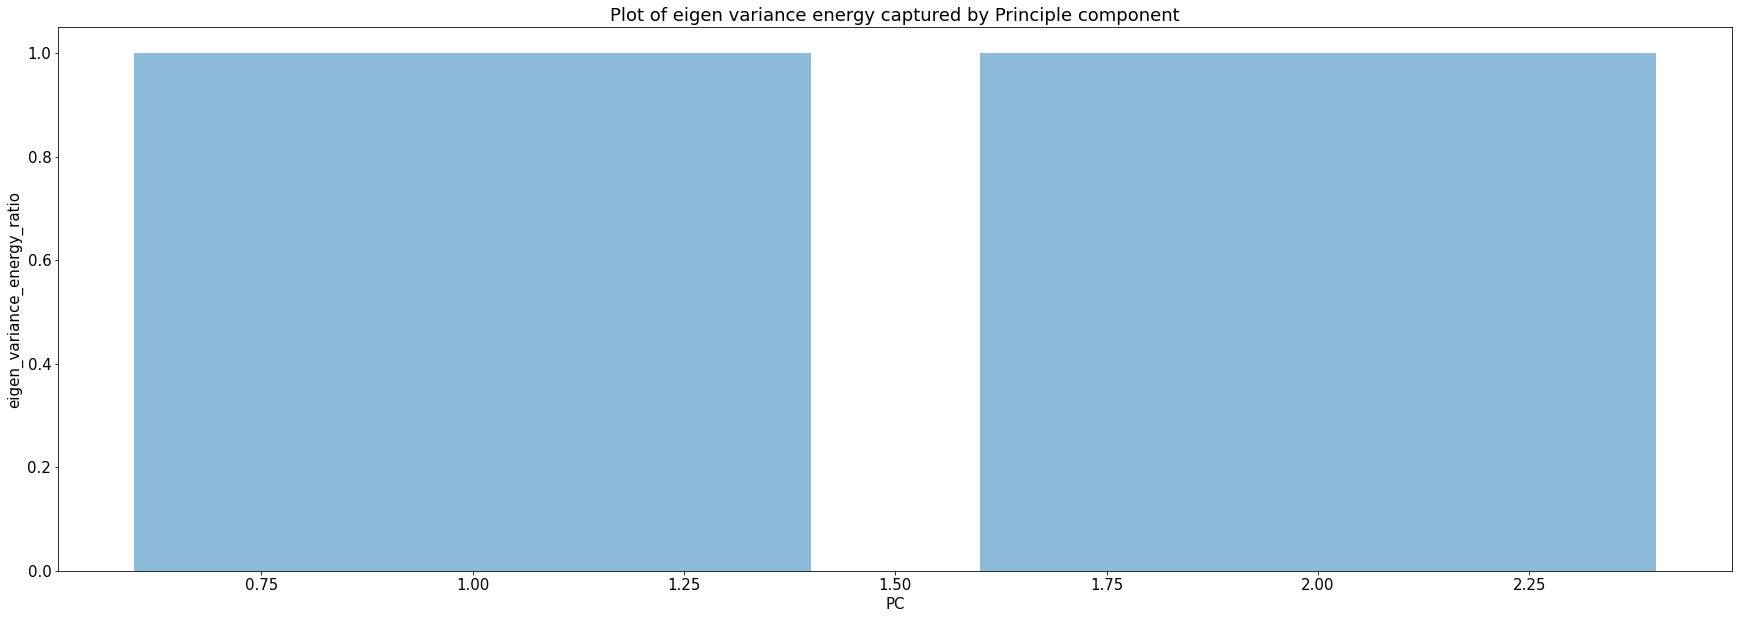

In [19]:
import matplotlib.pyplot as plt
eigen_energy=pca_all.explained_variance_ratio_
print(eigen_energy)
plt.figure(figsize=(30, 10))
plt.rcParams.update({'font.size': 15})
plt.bar(range(1,3), eigen_energy, alpha=0.5, align='center', label='individual explained variance')
plt.xlabel('PC')
plt.ylabel('eigen_variance_energy_ratio')
plt.title("Plot of eigen variance energy captured by Principle component")

# Step 11: Transaform the standardized

In [20]:
pca_2 = PCA(n_components=1)
pca_2.fit(standardized)
X_pca_2=pca_2.transform(standardized)
print(X_pca_2)
print(X_pca_2.shape) #2 PC used

[[-0.76557246]
 [-0.78098259]
 [-0.79639271]
 ...
 [-0.54983071]
 [-0.53442058]
 [-0.51901046]]
(120945, 1)


# Part B: Data Mining


Prediction Model: KNN & Decision Tree<br>
## Step 12: Find the Knee Point for KNN and Max Depth for Decision Tree

In [21]:
###########################################################
# Create the Training and Test set with split 70:30 
##########################################################

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_2, Y, test_size=0.3, random_state=12)
from sklearn import tree
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline

Text(0, 0.5, 'Accuracy')

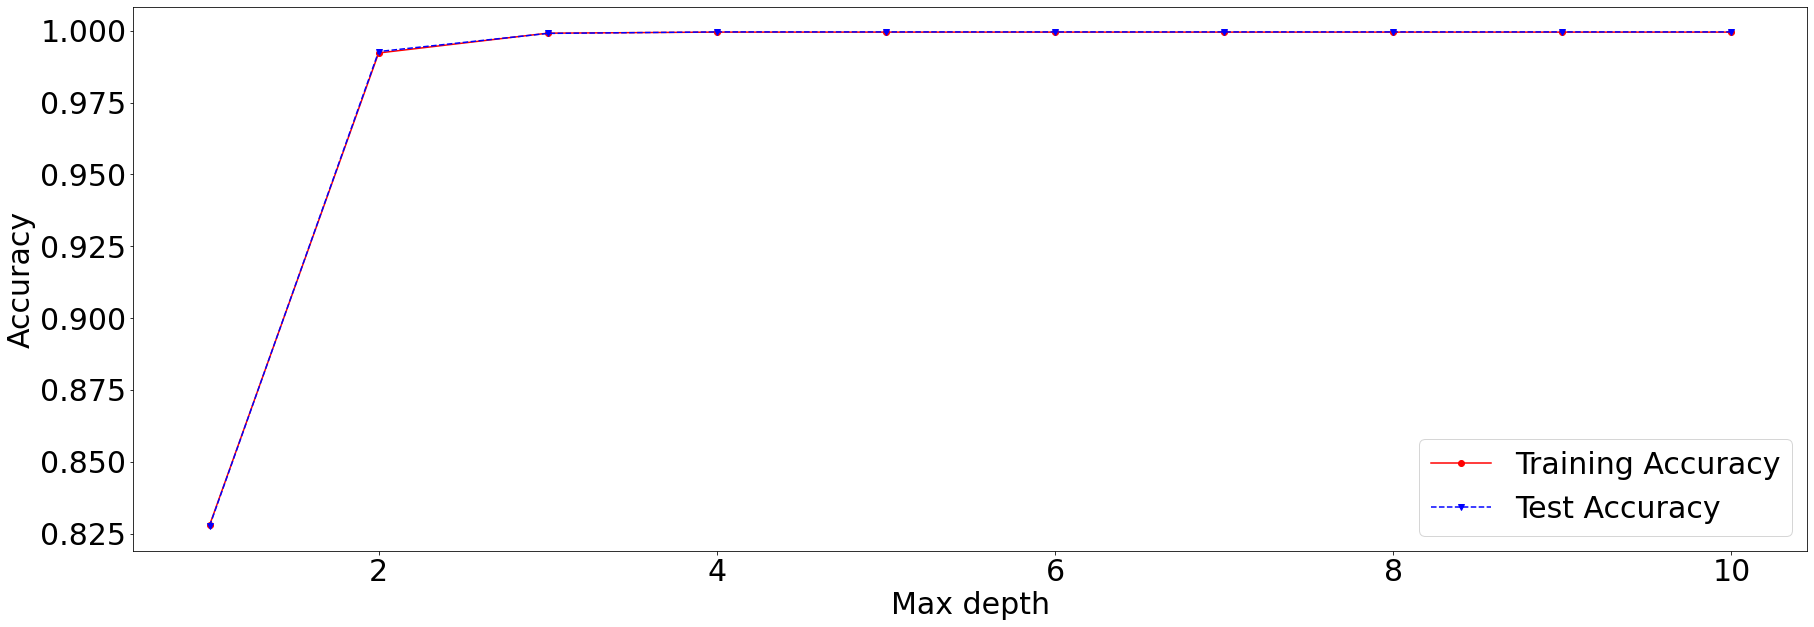

In [22]:
###########################################################################
# Model fit and performance evaluation for various tree depth from 2-50
###########################################################################
from sklearn.tree import DecisionTreeClassifier
maxdepths = [1,2,3,4,5,6,7,8,9,10]  # 10 different depths

trainAccuracy = np.zeros(len(maxdepths))
testAccuracy = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clfDT = tree.DecisionTreeClassifier(max_depth=depth)
    clfDT = clfDT.fit(X_train, Y_train)
    Y_predTrain = clfDT.predict(X_train)
    Y_predTest = clfDT.predict(X_test)
    trainAccuracy[index] = accuracy_score(Y_train, Y_predTrain)
    testAccuracy[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
    
###########################################################################
# Plot training and test accuracies
##########################################################################
plt.figure(figsize=(30, 10))
plt.rcParams.update({'font.size': 30})
plt.plot(maxdepths,trainAccuracy,'ro-',maxdepths,testAccuracy,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

# Part C: Data Visualization

As the KNN model have a poorer accuracy as the number of neighbors increases, it is not the best model to use to determine the risk level.<br>
As the Decision Tree model have a better accuracy as the max depth increases, it is a better model to use to determin the risk level.

## Step 13: Train Decision Tree prediction model

In [23]:
from sklearn import tree

Y = df_modified_threshold['risk_level']
X = df_modified_threshold.drop(['risk_level'],axis=1)

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=10)
clf = clf.fit(X, Y)

## Step 14: Plot Decision Tree

[Text(443.8636363636364, 996.6, 'wbgt <= 24.997\nentropy = 1.535\nsamples = 120945\nvalue = [50, 816, 50315, 49831, 19933]'),
 Text(317.0454545454545, 815.4000000000001, 'entropy = 0.0\nsamples = 49804\nvalue = [0, 0, 0, 49804, 0]'),
 Text(570.6818181818181, 815.4000000000001, 'wbgt <= 25.997\nentropy = 0.953\nsamples = 71141\nvalue = [50, 816, 50315, 27, 19933]'),
 Text(253.63636363636363, 634.2, 'wbgt <= 25.003\nentropy = 0.007\nsamples = 50316\nvalue = [0, 0, 50289, 27, 0]'),
 Text(126.81818181818181, 453.0, 'entropy = 0.151\nsamples = 1243\nvalue = [0, 0, 1216, 27, 0]'),
 Text(380.45454545454544, 453.0, 'entropy = 0.0\nsamples = 49073\nvalue = [0, 0, 49073, 0, 0]'),
 Text(887.7272727272727, 634.2, 'wbgt <= 26.997\nentropy = 0.277\nsamples = 20825\nvalue = [50, 816, 26, 0, 19933]'),
 Text(634.090909090909, 453.0, 'wbgt <= 26.003\nentropy = 0.014\nsamples = 19956\nvalue = [0, 0, 26, 0, 19930]'),
 Text(507.27272727272725, 271.79999999999995, 'entropy = 0.208\nsamples = 796\nvalue = [0

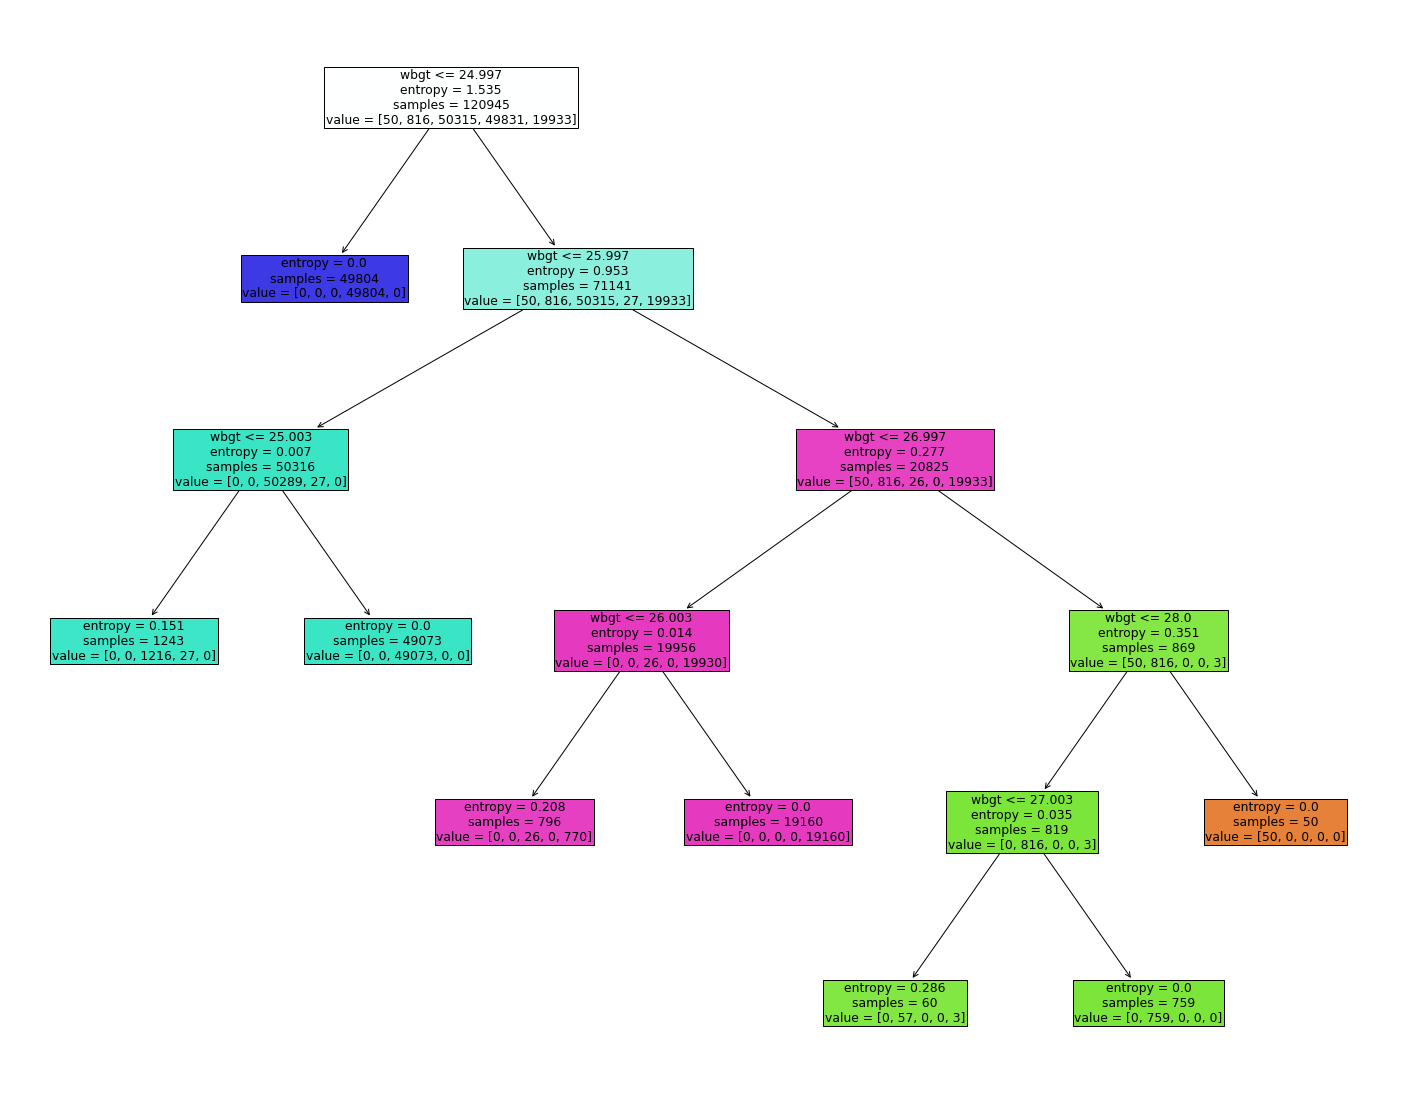

In [24]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf,feature_names=X.columns,filled=True, impurity=True)

In [25]:
df_modified_threshold

,wbgt,risk_level
0,24.486667,low_white
1,24.473333,low_white
2,24.460000,low_white
3,24.446667,low_white
4,24.433333,low_white
...,...,...
120940,24.646667,low_white
120941,24.660000,low_white
120942,24.673333,low_white
120943,24.686667,low_white


## Step 15: Test Decision Tree and predict risk level

In [27]:
Sample_WBGT_VALUE = 23
DTTraining = df_modified_threshold
predicted_DT_label = 'high_red'
testData = [[Sample_WBGT_VALUE,predicted_DT_label]]
testData = pd.DataFrame(testData, columns=DTTraining.columns)
testData

,wbgt,risk_level
0,23,high_red


## Step 16: Perform Decision Tree Recommendation

In [34]:
#testY = testData['risk_level']
testX = testData.drop(['risk_level'],axis=1)

predY = clf.predict(testX)
predictions = pd.concat([testData,pd.Series(predY,name='Predicted Risk')], axis=1)
predictions['Predicted Risk'].values[0]

'low_white'

## Step 17: Plot Confusion Maxtrix for Decision Tree

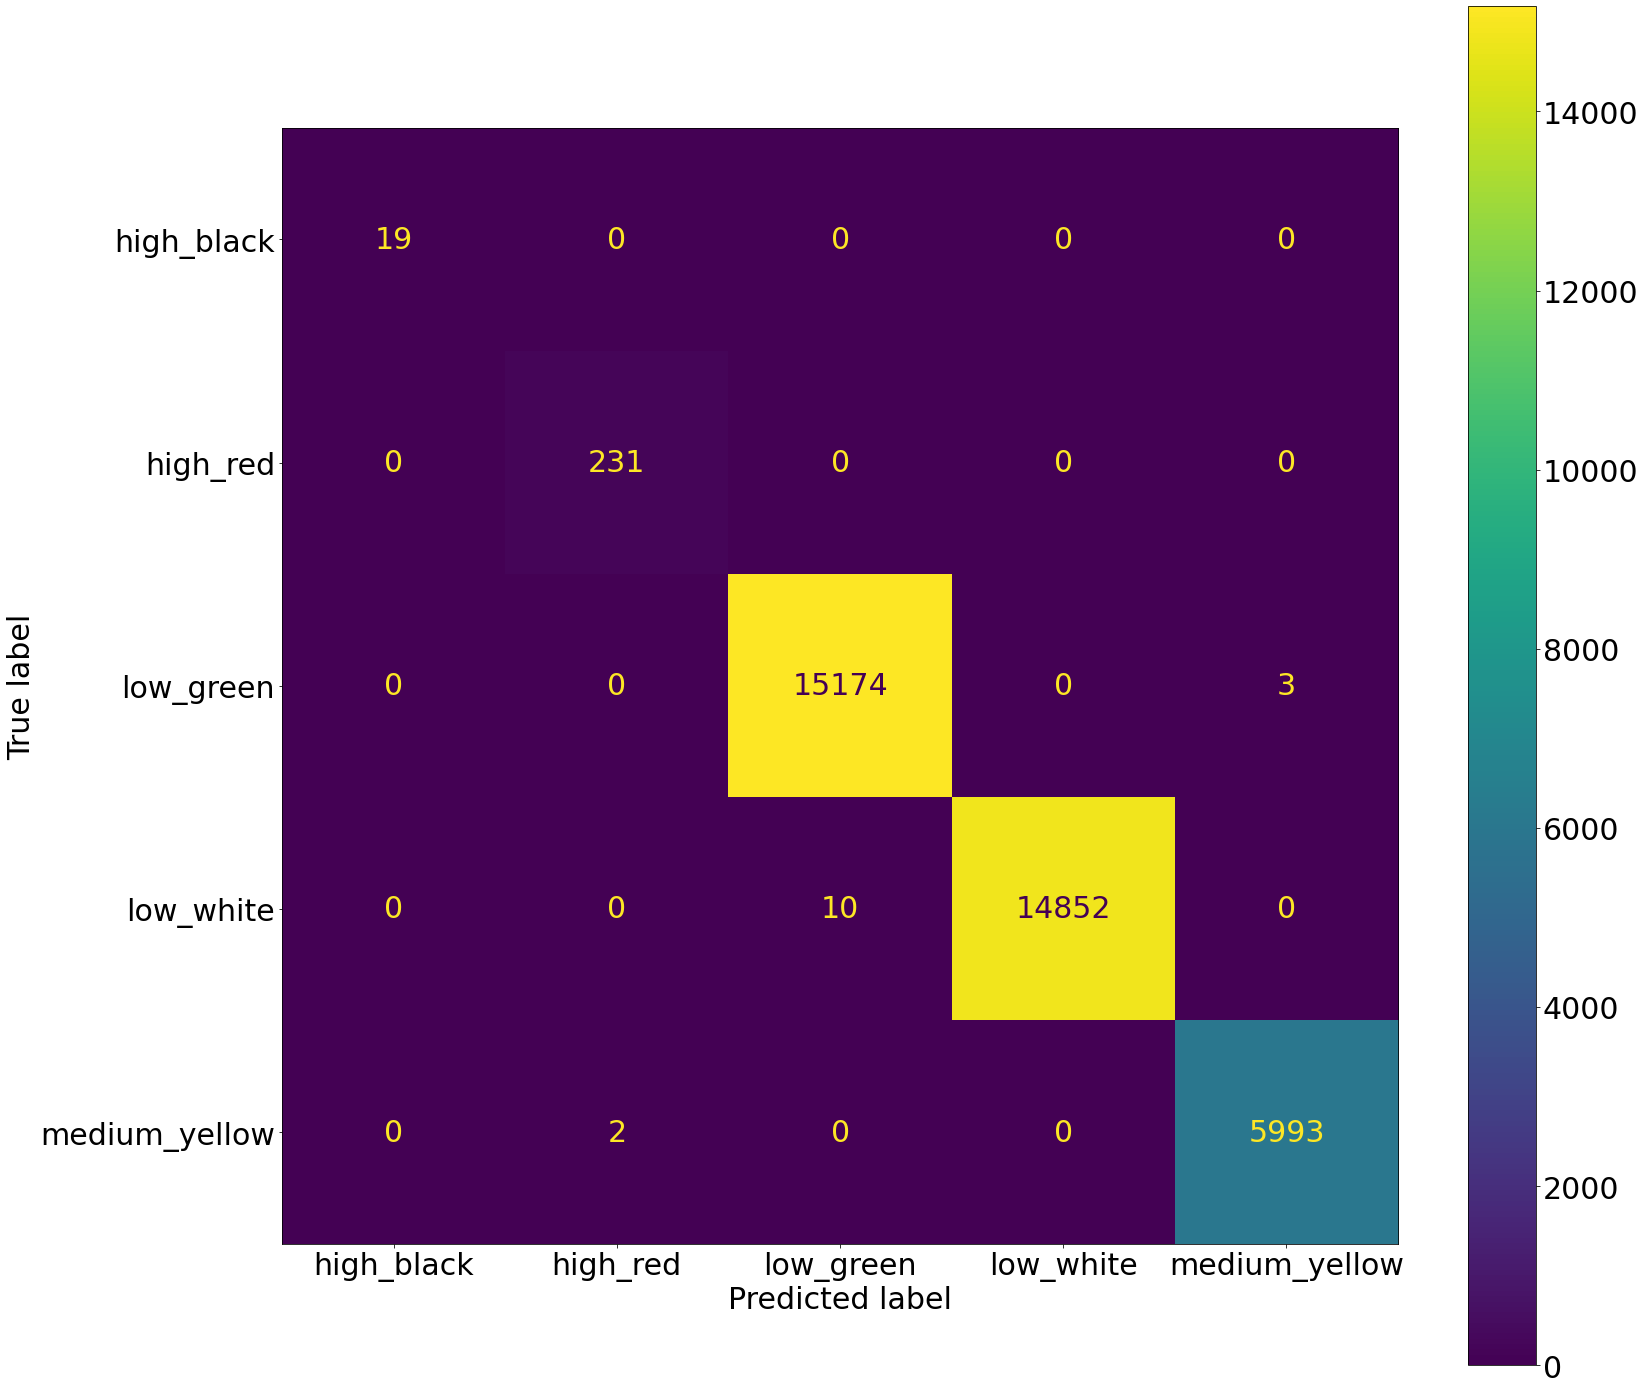

In [29]:
fig, ax = plt.subplots(figsize=(25, 25))
metrics.plot_confusion_matrix(clfDT, X_test, Y_test, ax=ax)

## Step 18: calculate mean, standard deviation, min, max, covariance and correlation

In [30]:
dfAnalysis = df_modified_threshold
dfAnalysis

,wbgt,risk_level
0,24.486667,low_white
1,24.473333,low_white
2,24.460000,low_white
3,24.446667,low_white
4,24.433333,low_white
...,...,...
120940,24.646667,low_white
120941,24.660000,low_white
120942,24.673333,low_white
120943,24.686667,low_white


In [31]:
from pandas.api.types import is_numeric_dtype

for col in dfAnalysis.columns:
    if is_numeric_dtype(dfAnalysis[col]):
        print('%s:' %(col))
        print('\t Mean = %.2f' %dfAnalysis[col].mean())
        print('\t Standard deviation = %.2f' %dfAnalysis[col].std())
        print('\t Minimum = %.2f' %dfAnalysis[col].min())
        print('\t Maximum = %.2f' %dfAnalysis[col].max())
    

wbgt:
	 Mean = 25.15
	 Standard deviation = 0.87
	 Minimum = 21.50
	 Maximum = 29.30


In [32]:
print("\nCovariance:")
dfAnalysis.cov()


Covariance:


,wbgt
wbgt,0.748633
